# RANDOM FOREST and LOGISTIC REGRESSION

In [20]:
# This two lines of code make your notebook aware of changes in
# your file without needing to restart the session each time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from random_forest_utils import random_forest
from logistic_regression_utils import logistic_regression
import mirdata
import numpy as np

In [22]:
# data_home = 'data' # here the location you want the data to be in your Drive
# dataset_name = 'gtzan_genre'
# dataset = mirdata.initialize(dataset_name, data_home=data_home)
# # dataset.download()
# print(len(dataset.track_ids))
# dataset.choice_track().audio



# temp

#data_home = '/home/ara/Documents/nyu_fa24_mir/mir_finalProj/data' # here the location you want the data to be in your Drive
data_home = 'gtzan_mini'
dataset_name = 'gtzan_genre'
dataset_version = 'mini'
dataset = mirdata.initialize(dataset_name, data_home=data_home, version=dataset_version)

# Uncomment the following line and run the download code once to download the data
# dataset.download()

# Uncomment the following line and run the validate code to check the data is correct
# dataset.validate()

# Check how many tracks and load a random track
print(len(dataset.track_ids))
dataset.choice_track().audio

100


(array([-0.0295105 , -0.03182983, -0.02349854, ..., -0.03009033,
        -0.02676392, -0.00540161], dtype=float32),
 22050)

In [23]:
# make obj
rf = random_forest()
lr = logistic_regression()

initializing random forest classifier
initializing logistic regression classifier


In [24]:
print(dataset.choice_track())

Track(
  audio_path="gtzan_mini/gtzan_mini-main/genres/reggae/reggae.00008.wav",
  beats_path="gtzan_mini/gtzan_tempo_beat-main/beats/gtzan_reggae_00008.beats",
  genre="reggae",
  tempo_path="gtzan_mini/gtzan_tempo_beat-main/tempo/gtzan_reggae_00008.bpm",
  track_id="reggae.00008",
  audio: The track's audio

        Returns,
  beats: ,
  tempo: ,
)


In [25]:
# # split data
# tracks = dataset.load_tracks()
# ratio = .3
# rf_X_train, rf_X_test, rf_y_train, rf_y_test = rf.split_data(tracks, ratio)
# lr_X_train, lr_X_test, lr_y_train, lr_y_test = lr.split_data(tracks, ratio)

In [26]:
# load pre-computed data
import pickle
from sklearn.model_selection import train_test_split
with open('dataset.pkl', 'rb') as f:
    df = pickle.load(f)

X = np.array(df['features'].tolist())
y = np.array(df['label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [27]:
# print(tracks['blues.00000'])

In [28]:
# get classifier
rf_model = rf.gen()
lr_model = lr.gen()

In [29]:
# fit
import numpy as np
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# predict
rf_y_pred = rf.pred(X_test)
lr_y_pred = lr.pred(X_test)

In [31]:
# eval
rf_accuracy_score, rf_classification_report = rf.eval(y_test, rf_y_pred)
lr_accuracy_score, lr_classification_report = lr.eval(y_test, lr_y_pred)

In [32]:
print(rf_accuracy_score)
print(lr_accuracy_score)

0.6733333333333333
0.58


In [33]:
print(rf_classification_report)
print(lr_classification_report)


              precision    recall  f1-score   support

       blues       0.74      0.71      0.72        35
   classical       0.89      0.92      0.91        26
     country       0.65      0.65      0.65        34
       disco       0.61      0.67      0.64        33
      hiphop       0.58      0.56      0.57        25
        jazz       0.67      0.75      0.71        32
       metal       0.83      0.86      0.85        29
         pop       0.61      0.74      0.67        27
      reggae       0.44      0.42      0.43        26
        rock       0.71      0.45      0.56        33

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300

              precision    recall  f1-score   support

       blues       0.64      0.60      0.62        35
   classical       0.87      0.77      0.82        26
     country       0.67      0.53      0.59        34
       disco       0.49 

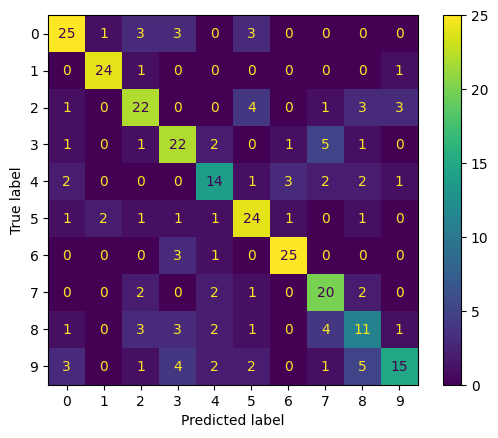

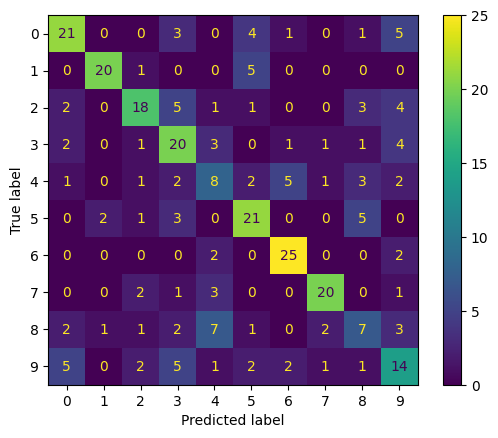

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 


rf_cm = confusion_matrix(y_test, rf_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)

rf_cmd = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_cmd.plot()
plt.show()

lr_cmd = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
lr_cmd.plot()
plt.show()

In [39]:
#variations on logistic regression - solver

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
lr_solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] # only newton-cg, sag, saga, lbfgs are multiclass
lr_pred = []
lr_pred_prob = []
for s in lr_solvers:
    lr = logistic_regression()
    lr_model = lr.gen(solver=s) # todo try penalties in saga 
    lr.fit(X_train, y_train)
    lr_y_pred = lr.pred(X_test)
    lr_pred.append(lr_y_pred)
    lr_pred_proba = lr.model.predict_proba(X_test)[:, 1]
    lr_pred_prob.append(lr_pred_proba)

initializing logistic regression classifier


/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


initializing logistic regression classifier
initializing logistic regression classifier
initializing logistic regression classifier
initializing logistic regression classifier
initializing logistic regression classifier


/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


model = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train)
prob_test_vec = model.predict_proba(X_test)

n_classes = 10
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * n_classes

y_test_roc = []
genre_list = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for x in y_test:
	y_test_roc.append(np.array([1 if x==i else 0 for i in genre_list]))
y_test_roc = np.array(y_test_roc)

for i in range(n_classes):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_roc[:, i], prob_test_vec[:, i])
	auc_score[i] = auc(fpr[i], tpr[i])

auc_score


/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

[0.8971428571428571,
 0.989612577203818,
 0.8980539584254755,
 0.8818522301668369,
 0.8191999999999999,
 0.8992537313432836,
 0.9786232345082072,
 0.9538732872066206,
 0.7443851768669287,
 0.7553058676654183]

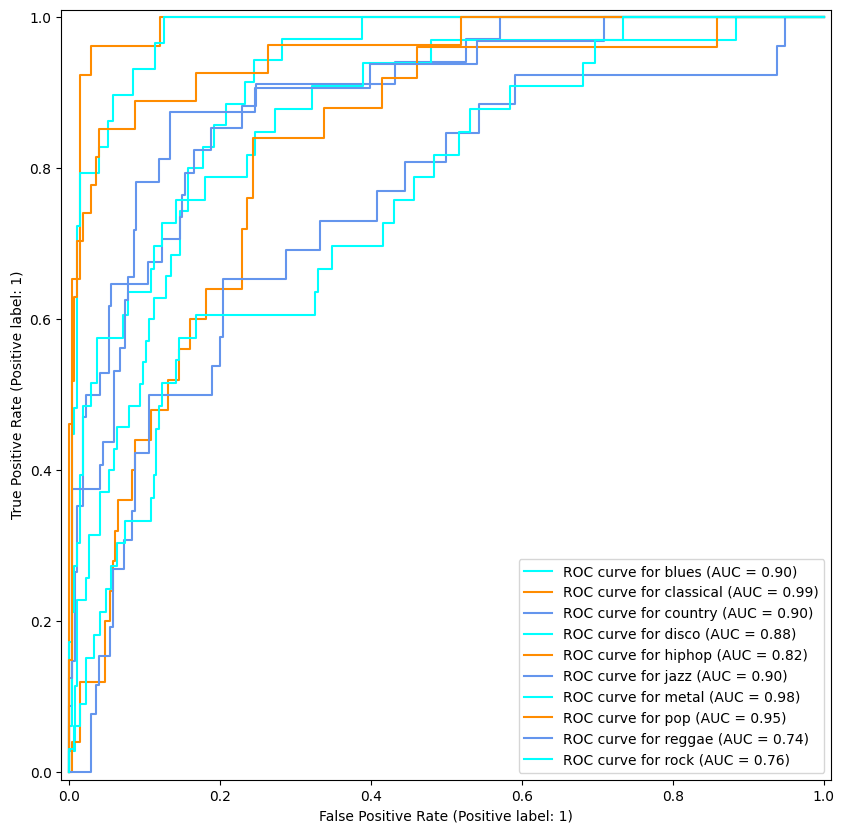

In [76]:
from sklearn.metrics import RocCurveDisplay
from itertools import cycle

fig, ax = plt.subplots(figsize=(10, 10))
target_names = genre_list
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
	RocCurveDisplay.from_predictions(
		y_test_roc[:, class_id],
		prob_test_vec[:, class_id],
		name=f"ROC curve for {target_names[class_id]}",
		color=color,
		ax=ax,
	)
